# Data preparation phase



In [71]:
from sklearn.datasets import fetch_california_housing
# as_frame=True loads the data in a dataframe format, with other metadata besides it
california_housing = fetch_california_housing(as_frame=True)
# Select only the dataframe part and assign it to the df variable
df = california_housing.frame


In [72]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [73]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


# Implementation of the KNN algorithm for the regression




In [75]:
import pandas as pd
y = df['MedHouseVal']
X = df.drop(['MedHouseVal'], axis = 1)
print(y.head())


0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64


In [76]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [77]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000


In [78]:
from sklearn.model_selection import train_test_split

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)

In [79]:
print(len(X_train))
print(len(y_train))

15480
15480


In [80]:
print(len(X_test))
print(len(y_test))


5160
5160


In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only on X_train
scaler.fit(X_train)

# Scale both X_train and X_test
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [82]:
X_train

array([[ 0.17648852,  0.66640687, -0.06085431, ..., -0.04828325,
        -0.8607415 ,  0.73099911],
       [ 0.77137436,  1.06288858,  0.38352076, ..., -0.05872947,
         0.70916822, -1.19670983],
       [ 0.02142423,  0.58711053,  0.27852339, ..., -0.07283798,
         1.31370062, -1.55128842],
       ...,
       [-0.49582442,  0.58711053, -0.5983225 , ...,  0.01885405,
        -0.75764295,  0.60115343],
       [ 0.96699069, -1.07811266,  0.39633361, ...,  0.0060417 ,
         0.90599273, -1.1867217 ],
       [-0.68434939,  1.855852  , -0.83954627, ..., -0.08347358,
         0.99503238, -1.41644868]])

In [83]:
X_test

array([[-1.15411223, -0.28514924, -0.51346718, ...,  0.06447083,
         0.19367548,  0.28652736],
       [-0.70756701,  0.11133247, -0.16361884, ..., -0.03570466,
        -0.23746391,  0.06179445],
       [-0.20917611,  1.855852  , -0.6022714 , ..., -0.14606959,
         1.00909127, -1.4264368 ],
       ...,
       [-0.89908611,  0.66640687, -0.89340574, ...,  0.12360294,
        -0.76232924,  0.66108221],
       [ 1.58036659, -1.79177974,  0.80393479, ..., -0.04836253,
         1.34181841, -0.73725589],
       [ 1.44652384,  0.58711053,  0.12349223, ..., -0.04755791,
        -0.82325111,  0.5911653 ]])

In [84]:
col_names=['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
scaled_df = pd.DataFrame(X_train, columns=col_names)
scaled_df.describe().T


,count,mean,std,min,25%,50%,75%,max
MedInc,15480.0,2.172968e-16,1.000032,-1.774632,-0.688854,-0.175663,0.464450,5.842113
HouseAge,15480.0,-1.254954e-16,1.000032,-2.188261,-0.840224,0.032036,0.666407,1.855852
AveRooms,15480.0,-1.148163e-16,1.000032,-1.877586,-0.407008,-0.083940,0.257082,56.357392
AveBedrms,15480.0,1.239408e-16,1.000032,-1.740123,-0.205765,-0.108332,0.007435,55.925392
Population,15480.0,-7.874838e-17,1.000032,-1.246395,-0.558886,-0.227928,0.262056,29.971725
AveOccup,15480.0,2.672550e-17,1.000032,-0.201946,-0.056581,-0.024172,0.014501,103.737365
Latitude,15480.0,8.022581e-16,1.000032,-1.451215,-0.799820,-0.645172,0.971601,2.953905
Longitude,15480.0,2.169625e-15,1.000032,-2.380303,-1.106817,0.536231,0.785934,2.633738


# Train and evaluate a KNN-based regressor



In [85]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors=5)
regressor.fit(X_train, y_train)


KNeighborsRegressor()

In [86]:
y_pred=regressor.predict(X_test)

In [87]:
y_pred

array([0.4988  , 0.7646  , 4.750006, ..., 1.3708  , 2.7464  , 3.979202])

In [88]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'mae: {mae}')
print(f'mse: {mse}')
print(f'rmse: {rmse}')


mae: 0.4460739527131783
mse: 0.4316907430948294
rmse: 0.6570317671884894


In [89]:
regressor.score(X_test,y_test)

0.6737569252627673

In [90]:
y.describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64

With a value of 0.67, we can see that our model explains 67% of the data variance. It is already more than 50%, which is ok, but not very good. Is there any way we could do better?

We have used a predetermined K with a value of 5, so, we are using 5 neighbors to predict our targets which is not necessarily the best number. To understand which would be an ideal number of Ks, we can analyze our algorithm errors and choose the K that minimizes the loss.



# Finding the Best K for KNN Regression


In [91]:
error = []

# Calculating MAE error for K values between 1 and 39
for i in range(1, 40):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    mae = mean_absolute_error(y_test, pred_i)
    error.append(mae)


In [92]:
error

[0.533233034883721,
 0.48023760949612393,
 0.45604520671834625,
 0.4494199268410853,
 0.4460739527131783,
 0.44479934270025834,
 0.44321736766334435,
 0.44038533963178295,
 0.4394256597760552,
 0.4386824974806201,
 0.436979306906272,
 0.43631325936692505,
 0.4367335062611807,
 0.4385530221483942,
 0.437847838630491,
 0.4392253599806201,
 0.4404185046739626,
 0.44063279565030145,
 0.4425035770093839,
 0.44344225910852714,
 0.44328694647471395,
 0.44427369970049335,
 0.44534305047185707,
 0.4462705264050388,
 0.446620864883721,
 0.4470135314549791,
 0.4478080319408556,
 0.4484983565891473,
 0.4486739005613472,
 0.44872229147286813,
 0.44964641172793196,
 0.45074862711967045,
 0.45192889752172893,
 0.4526734859781122,
 0.4530404439091915,
 0.4537085478574504,
 0.45405998287240723,
 0.4545694018257854,
 0.454968569171139]

Text(0, 0.5, 'Mean Absolute Error')

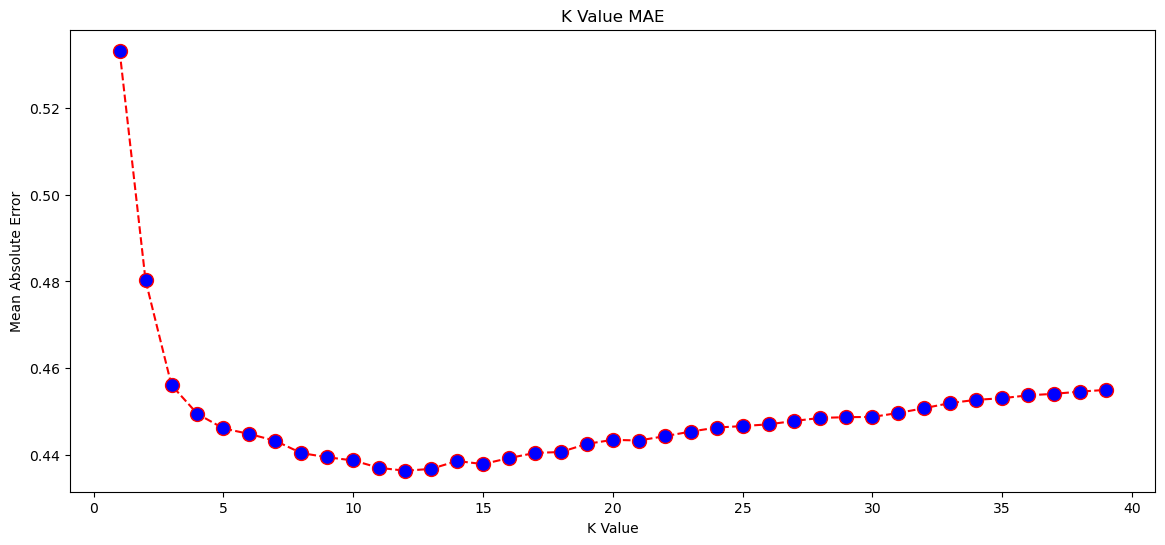

In [93]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,6));
plt.plot(range(1, 40), error, color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
         
plt.title('K Value MAE')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error')



Text(0, 0.5, 'Mean Absolute Error')

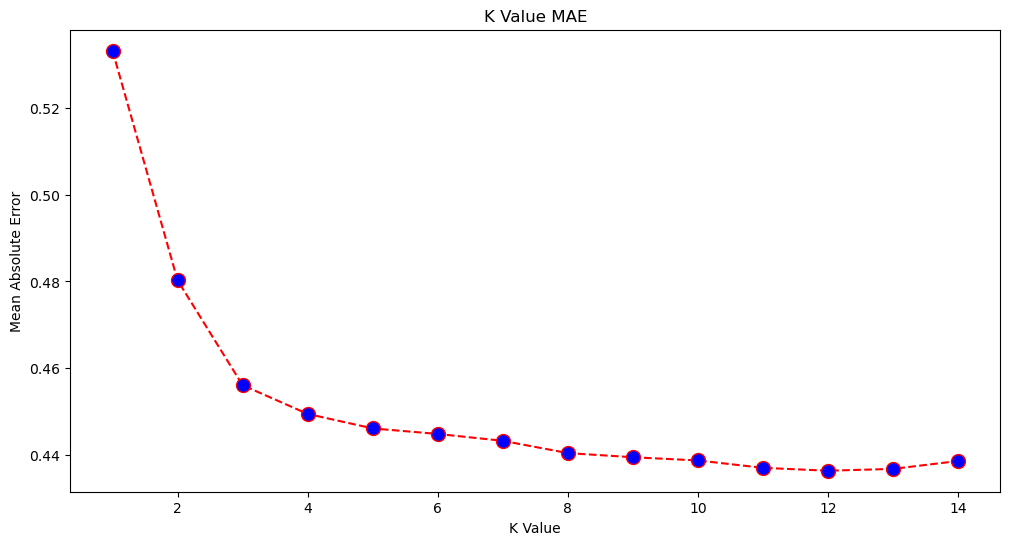

In [94]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 15), error[:14], color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('K Value MAE')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error')


In [95]:
import numpy as np
print(min(error))
print(np.array(error).argmin())

0.43631325936692505
11


In [96]:
#Running our model once again but with n_neighbors=12
knn_reg12 = KNeighborsRegressor(n_neighbors=12)
knn_reg12.fit(X_train, y_train)
y_pred12 = knn_reg12.predict(X_test)
r2 = knn_reg12.score(X_test, y_test) 

mae12 = mean_absolute_error(y_test, y_pred12)
mse12 = mean_squared_error(y_test, y_pred12)
rmse12 = mean_squared_error(y_test, y_pred12, squared=False)
print(f'r2: {r2}, \nmae: {mae12} \nmse: {mse12} \nrmse: {rmse12}')


r2: 0.6887495617137436, 
mae: 0.43631325936692505 
mse: 0.4118522151025172 
rmse: 0.6417571309323467


# Classification using K-Nearest Neighbors with Scikit-Learn


In [97]:
# Creating 4 categories and assigning them to a MedHouseValCat column
df["MedHouseValCat"] = pd.qcut(df["MedHouseVal"], 4, retbins=False, labels=[1, 2, 3, 4])


In [98]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,MedHouseValCat
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,4
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,4
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,4
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,4


In [99]:
df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,MedHouseValCat
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,1
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,1
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,1
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,1
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894,1


In [100]:
df.groupby(['MedHouseVal'])['MedHouseValCat'].count()

MedHouseVal
0.14999      4
0.17500      1
0.22500      4
0.25000      1
0.26600      1
          ... 
4.98800      1
4.99000      1
4.99100      1
5.00000     27
5.00001    965
Name: MedHouseValCat, Length: 3842, dtype: int64

In [101]:
df.groupby(['MedHouseValCat']).size()

MedHouseValCat
1    5162
2    5161
3    5157
4    5160
dtype: int64

In [102]:
df.groupby(['MedHouseValCat']).count()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedHouseValCat,,,,,,,,,
1,5162,5162,5162,5162,5162,5162,5162,5162,5162
2,5161,5161,5161,5161,5161,5161,5161,5161,5161
3,5157,5157,5157,5157,5157,5157,5157,5157,5157
4,5160,5160,5160,5160,5160,5160,5160,5160,5160


In [103]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


y = df['MedHouseValCat']
X = df.drop(['MedHouseVal', 'MedHouseValCat'], axis = 1)

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)



In [104]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


The confusion_matrix() and classification_report() methods of the sklearn.metrics module can be used to calculate and display all these metrics. The confusion_matrix is better visualized using a heatmap. The classification report already gives us accuracy, precision, recall, and f1-score, but you could also import each of these metrics from sklearn.metrics.



              precision    recall  f1-score   support

           1       0.75      0.78      0.76      1292
           2       0.49      0.56      0.53      1283
           3       0.51      0.51      0.51      1292
           4       0.76      0.62      0.69      1293

    accuracy                           0.62      5160
   macro avg       0.63      0.62      0.62      5160
weighted avg       0.63      0.62      0.62      5160



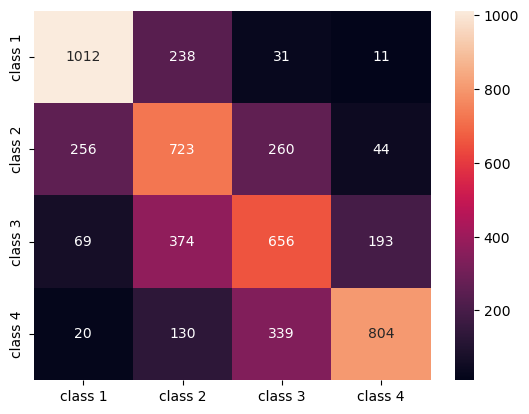

In [105]:
from sklearn.metrics import classification_report, confusion_matrix
#importing Seaborn's to use the heatmap 
import seaborn as sns

# Adding classes names for better interpretation
classes_names = ['class 1','class 2','class 3', 'class 4']
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, y_pred))


# Finding the Best K for KNN Classification


In [106]:
#eliminating warning that can come up during training our model
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn


In [107]:
from sklearn.metrics import f1_score

f1s = []

# Calculating f1 score for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    # using average='weighted' to calculate a weighted average for the 4 classes 
    f1s.append(f1_score(y_test, pred_i, average='weighted'))


Text(0, 0.5, 'F1 Score')

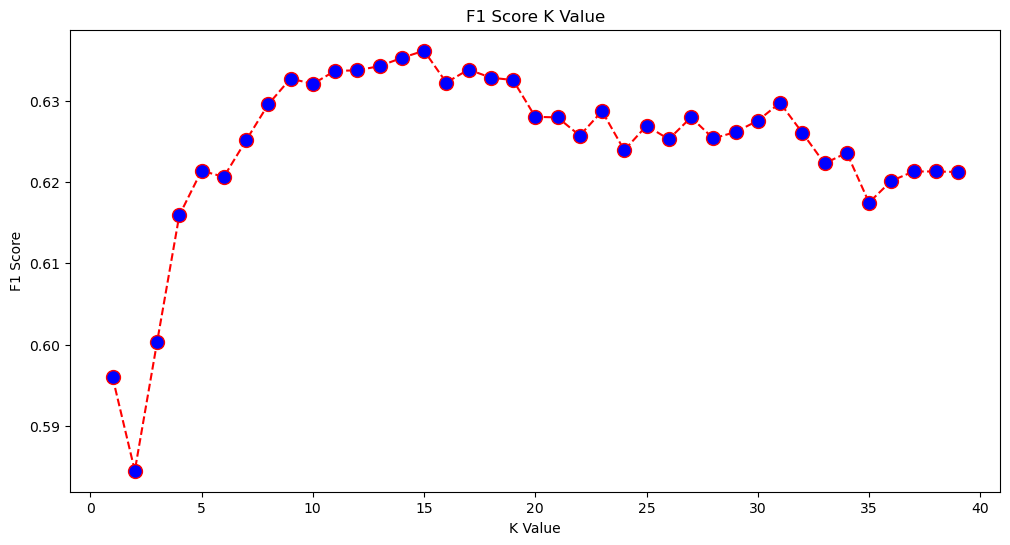

In [108]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), f1s, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')


In [109]:
classifier15 = KNeighborsClassifier(n_neighbors=15)
classifier15.fit(X_train, y_train)
y_pred15 = classifier15.predict(X_test)
print(classification_report(y_test, y_pred15))


              precision    recall  f1-score   support

           1       0.77      0.79      0.78      1292
           2       0.52      0.58      0.55      1283
           3       0.51      0.53      0.52      1292
           4       0.77      0.64      0.70      1293

    accuracy                           0.63      5160
   macro avg       0.64      0.63      0.64      5160
weighted avg       0.64      0.63      0.64      5160



# Implementing KNN for Outlier Detection with Scikit-Learn


In [110]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors = 5)
nbrs.fit(X_train)
# Distances and indexes of the 5 neighbors 
distances, indexes = nbrs.kneighbors(X_train)


In [111]:
distances[:3], distances[:3].shape


(array([[0.        , 0.12998939, 0.15157687, 0.16543705, 0.17750354],
        [0.        , 0.25535314, 0.37100754, 0.39090243, 0.40619693],
        [0.        , 0.27149697, 0.28024623, 0.28112326, 0.30420656]]),
 (3, 5))

Text(0, 0.5, 'Mean Distances')

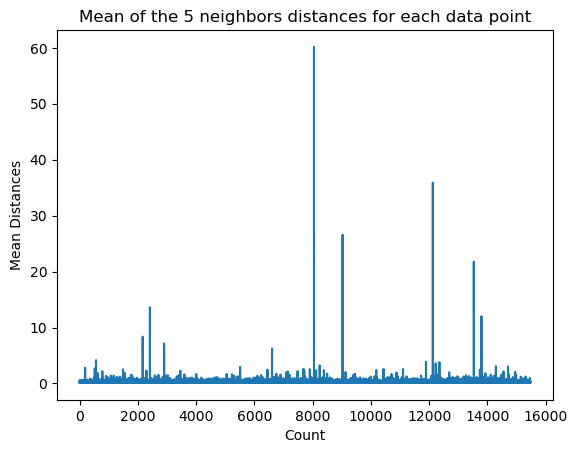

In [112]:
dist_means = distances.mean(axis=1)
plt.plot(dist_means)
plt.title('Mean of the 5 neighbors distances for each data point')
plt.xlabel('Count')
plt.ylabel('Mean Distances')


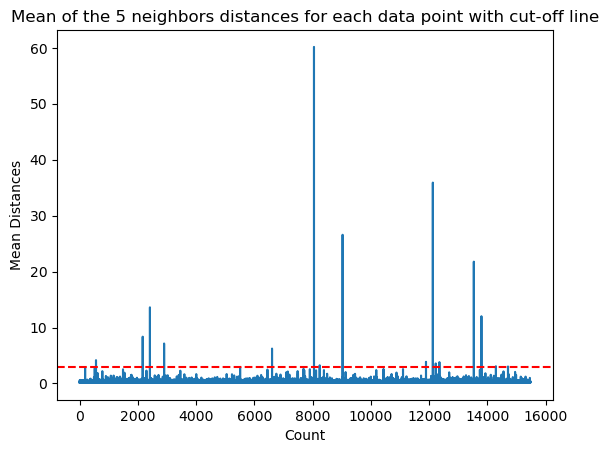

In [113]:
dist_means = distances.mean(axis=1)
plt.plot(dist_means)
plt.title('Mean of the 5 neighbors distances for each data point with cut-off line')
plt.xlabel('Count')
plt.ylabel('Mean Distances')
plt.axhline(y = 3, color = 'r', linestyle = '--')


This line marks the mean distance for which above it all values vary. This means that all points with a mean distance above 3 are our outliers

In [114]:
import numpy as np
# Visually determine cutoff values > 3
outlier_index = np.where(dist_means > 3)
outlier_index


(array([  564,  2167,  2415,  2902,  6607,  8047,  8243,  9029, 11892,
        12127, 12226, 12353, 13534, 13795, 14292, 14707], dtype=int64),)

In [115]:
# Filter outlier values
outlier_values = df.iloc[outlier_index]
outlier_values


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,MedHouseValCat
564,4.8711,27.0,5.082811,0.944793,1499.0,1.880803,37.75,-122.24,2.86600,4
2167,2.8359,30.0,4.948357,1.001565,1660.0,2.597809,36.78,-119.83,0.80300,1
2415,2.8250,32.0,4.784232,0.979253,761.0,3.157676,36.59,-119.44,0.67600,1
2902,1.1875,48.0,5.492063,1.460317,129.0,2.047619,35.38,-119.02,0.63800,1
6607,3.5164,47.0,5.970639,1.074266,1700.0,2.936097,34.18,-118.14,2.26500,3
8047,2.7260,29.0,3.707547,1.078616,2515.0,1.977201,33.84,-118.17,2.08700,3
8243,2.0769,17.0,3.941667,1.211111,1300.0,3.611111,33.78,-118.18,1.00000,1
9029,6.8300,28.0,6.748744,1.080402,487.0,2.447236,34.05,-118.78,5.00001,4
11892,2.6071,45.0,4.225806,0.903226,89.0,2.870968,33.99,-117.35,1.12500,1
12127,4.1482,7.0,5.674957,1.106998,5595.0,3.235975,33.92,-117.25,1.24600,2
